In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import (bin_data, binned_positive_label_prob, apply_to_all, apply_to_merged_splits,
                            meta_confidence_and_accuracy, tpr_diff_and_accuracy)

In [11]:
dataset_name = "propublica-recidivism"
sensitives = ["race", "sex"]
split_ids = [0, 1, 2, 3, 4]
algo_names = [#"UGP_dem_par_in_False", "UGP_dem_par_in_True", "UGP_in_False", "UGP_in_True",
              "ULR_eq_opp_in_False", "ULR_eq_opp_in_True", "ULR_in_False", "ULR_in_True"]
dataset, results = load(dataset_name, sensitives, split_ids, algo_names)

Text(0.5,0.98,'Histogram, Propublica (race)')

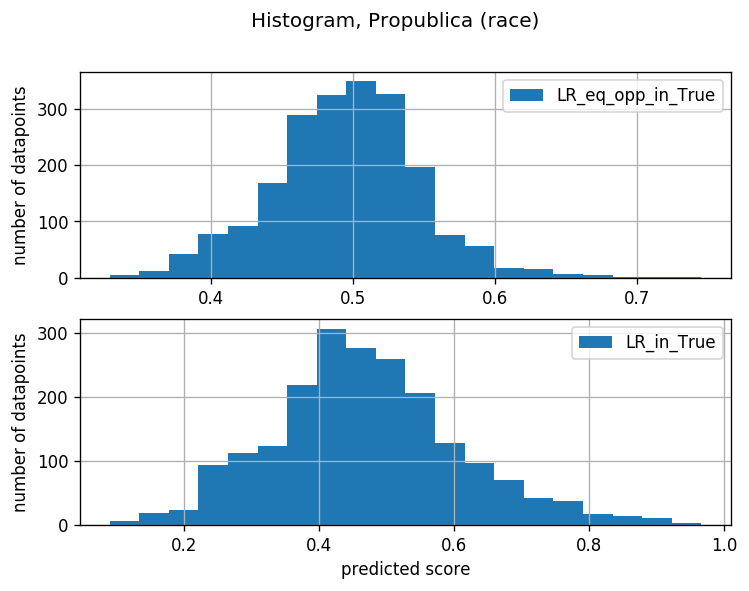

In [4]:
fig, plots = plt.subplots(2, 1, figsize=(7, 5), dpi=120)
#plot.plot(results_propublica['UGP_eq_opp_in_False']['race'][0]['pred_mean'], propublica['race'][0]['ytest'], 'o')
plots[0].hist(results['ULR_eq_opp_in_True']['race'][0]['pred_mean'], bins=20, label='LR_eq_opp_in_True')
plots[1].hist(results['ULR_in_True']['race'][0]['pred_mean'], bins=20, label='LR_in_True')
plots[1].set_xlabel('predicted score')
for plot in plots:
    plot.set_ylabel('number of datapoints')
    #plot.set_xlim((.47, .54))
    plot.grid()
    plot.legend()
fig.suptitle('Histogram, Propublica (race)')
#fig.savefig('histogram_adult_race_lr.svg')

In [5]:
conf_acc = apply_to_merged_splits(meta_confidence_and_accuracy(15), results, dataset)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
conf_acc_s0 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=0), results, dataset)
conf_acc_s1 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=1), results, dataset)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
confidence, accuracy = conf_acc['ULR_eq_opp_in_False']['race']
#scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
#confidence = 0.5 * (confidence - 0.5) / scale + 0.5

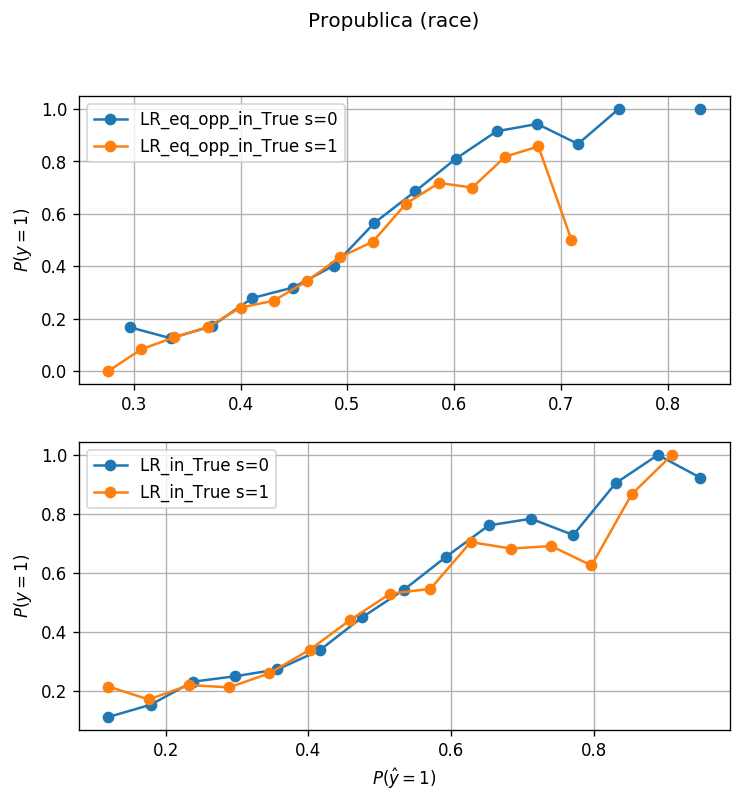

In [8]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['ULR_eq_opp_in_True']['race'], 'o-', label='LR_eq_opp_in_True s=0')
plots[0].plot(*conf_acc_s1['ULR_eq_opp_in_True']['race'], 'o-', label='LR_eq_opp_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['ULR_in_True']['race'], 'o-', label='LR_in_True s=0')
plots[1].plot(*conf_acc_s1['ULR_in_True']['race'], 'o-', label='LR_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Propublica (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
#fig.savefig('confidence_adult_race_by_s_lr.svg')

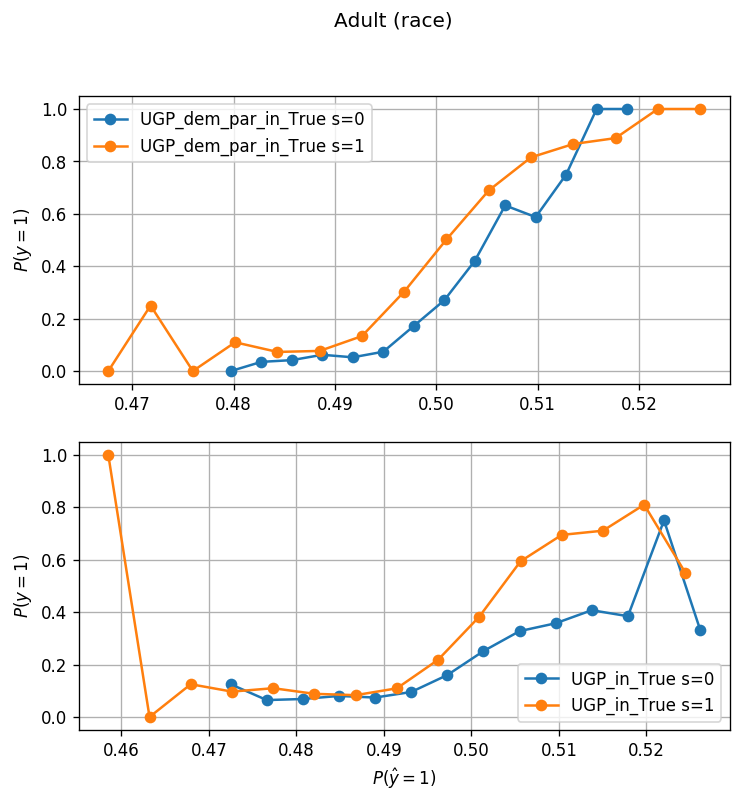

In [22]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=0')
plots[0].plot(*conf_acc_s1['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['UGP_in_True']['race'], 'o-', label='UGP_in_True s=0')
plots[1].plot(*conf_acc_s1['UGP_in_True']['race'], 'o-', label='UGP_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
fig.savefig('confidence_adult_race_by_s.svg')

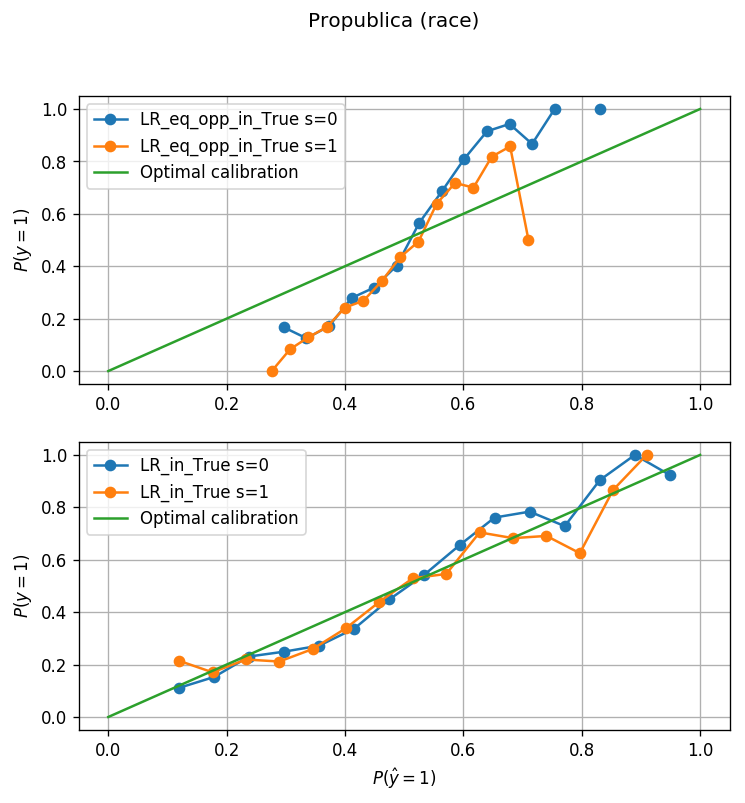

In [9]:
for plot in plots:
    plot.plot([0, 1], [0, 1], label='Optimal calibration')
    plot.legend()
fig.savefig('confidence_adult_race_with_optimal_scaled_lr.svg')
fig

In [12]:
def tpr_ratio_and_accuracy(result, dataset):
    """Compute TPR difference and accuracy"""
    # gather data
    scores = result['pred_mean']
    labels = dataset['ytest']
    sensitive = dataset['stest']
    # P(yhat=1|y=1, s=0)
    tpr_s0 = np.mean(scores[(sensitive == 0) & (labels == 1)] > 0.5)
    # P(yhat=1|y=1, s=1)
    tpr_s1 = np.mean(scores[(sensitive == 1) & (labels == 1)] > 0.5)
    accuracy = np.mean((scores > 0.5).astype(np.int) == labels)
    return tpr_s0 / tpr_s1, accuracy
apply_to_all(tpr_ratio_and_accuracy, results, dataset)

{'ULR_eq_opp_in_False': {'race': {0: (1.2947294033266885, 0.6494895478852698),
   1: (1.354449472096531, 0.6407389402041809),
   2: (1.2955082742316784, 0.6329606222654351),
   3: (1.3043013168169613, 0.6402527953330093),
   4: (1.3000879839115134, 0.6295576081672338)},
  'sex': {0: (0.8719661253710493, 0.628099173553719),
   1: (0.8661053694464244, 0.6421973748176957),
   2: (0.890746934225195, 0.6397666504618377),
   3: (0.9364262641854615, 0.6358774914924648),
   4: (0.8092120278443454, 0.6315021876519202)}},
 'ULR_eq_opp_in_True': {'race': {0: (1.4094459827559036, 0.6456003889158969),
   1: (1.3106658047834516, 0.6295576081672338),
   2: (1.3477634452173521, 0.6261545940690326),
   3: (1.3067575892762304, 0.6227515799708313),
   4: (1.518694281965444, 0.6353913466212932)},
  'sex': {0: (0.8916865406958968, 0.6353913466212932),
   1: (0.8860784492449791, 0.6421973748176957),
   2: (0.8898579652289623, 0.6533787068546427),
   3: (0.9905251040467546, 0.6383082158483228),
   4: (0.8765